## BERTScore on EssayDataset

In [0]:
import torch
print(torch.__version__)
# !pip install torch

1.4.0


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install bert_score -q
import bert_score
bert_score.__version__

     |████████████████████████████████| 61kB 5.0MB/s 
     |████████████████████████████████| 573kB 13.8MB/s 
     |████████████████████████████████| 3.7MB 24.8MB/s 
     |████████████████████████████████| 1.0MB 43.4MB/s 
     |████████████████████████████████| 890kB 55.7MB/s 


'0.3.2'

In [0]:
import pandas as pd
import numpy as np
import os

filename = 'gdrive/My Drive/Colab Notebooks/Data/asap_sas.tsv'
df = pd.read_csv(filename, delimiter='\t')

can1 = df.loc[(df['EssaySet'] == 3) & (df['Score1'] != 2)]
can1.reset_index(drop=True, inplace=True)
cands = list(can1['EssayText'])
print("Candidate Sentences: ", len(cands))
# print(cands[0])

ref1 = df.loc[(df['EssaySet'] == 3) & (df['Score1'] == 2)]
ref1.reset_index(drop=True, inplace=True)
refs = list(ref1['EssayText'])
print("Reference Sentences: ", len(refs))
# print(refs[0])

Candidate Sentences:  1450
Reference Sentences:  441


In [0]:
# broadcasting refs so that len(cands) == len(refs)
refs = [refs] * len(cands)
assert len(cands) == len(refs)

In [0]:
print(len(cands), type(cands))
print(len(refs), type(refs))

1450 <class 'list'>
1450 <class 'list'>


In [0]:
from bert_score import score

sol = score(cands, refs, model_type=None, num_layers=None, verbose=True,
            idf=True, device=None, batch_size=64, nthreads=4, all_layers=False,
            lang="en", return_hash=False, rescale_with_baseline=True)


preparing IDF dict...
done in 187.47 seconds
calculating scores...
computing bert embedding.



computing greedy matching.



done in -635845.30 seconds, -1.01 sentences/sec


In [0]:
P = sol[0]
R = sol[1]
F1 = sol[2]
print(len(F1))

1450


In [0]:
print(can1.columns)
odf = pd.DataFrame()
odf['cand id'] = can1['Id']
odf['similarity score'] = pd.DataFrame(F1)
odf['score'] = can1['Score1']
odf.reset_index(drop=True, inplace=True)
print(odf.columns)

odf.to_csv("outs.tsv", sep="\t", index=False, header=True)

Index(['Id', 'EssaySet', 'Score1', 'Score2', 'EssayText'], dtype='object')
Index(['cand id', 'similarity score', 'score'], dtype='object')


In [0]:
import matplotlib.pyplot as plt

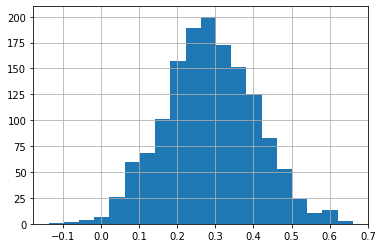

In [0]:
plt.grid(True)
plt.hist(F1, bins=20)
plt.show()
# plt.savefig('histogram_all.png')

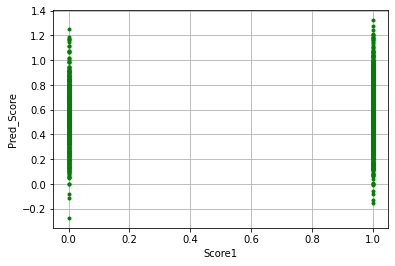

In [0]:
plt.xlabel("Score1")
plt.ylabel("Pred_Score")
plt.grid(True)
plt.plot(odf['score'], odf['similarity score'] * 2, '.g')
plt.show()
# plt.savefig('scatter.png')

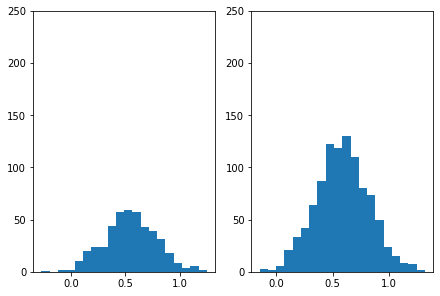

In [0]:
max_score = 2
_, ax = plt.subplots(ncols=max_score, nrows=1, constrained_layout=True)
for i in range(max_score):
  daf = odf.loc[(odf['score'] == i)]
  # if (i != max_score):
  #   ax[i].set_xlim(-0.03, 2.03)
  ax[i].set_ylim(0, 250)
  ax[i].hist(daf['similarity score'] * 2, bins = 20)
plt.show()
# plt.savefig('histograms_ind.png')

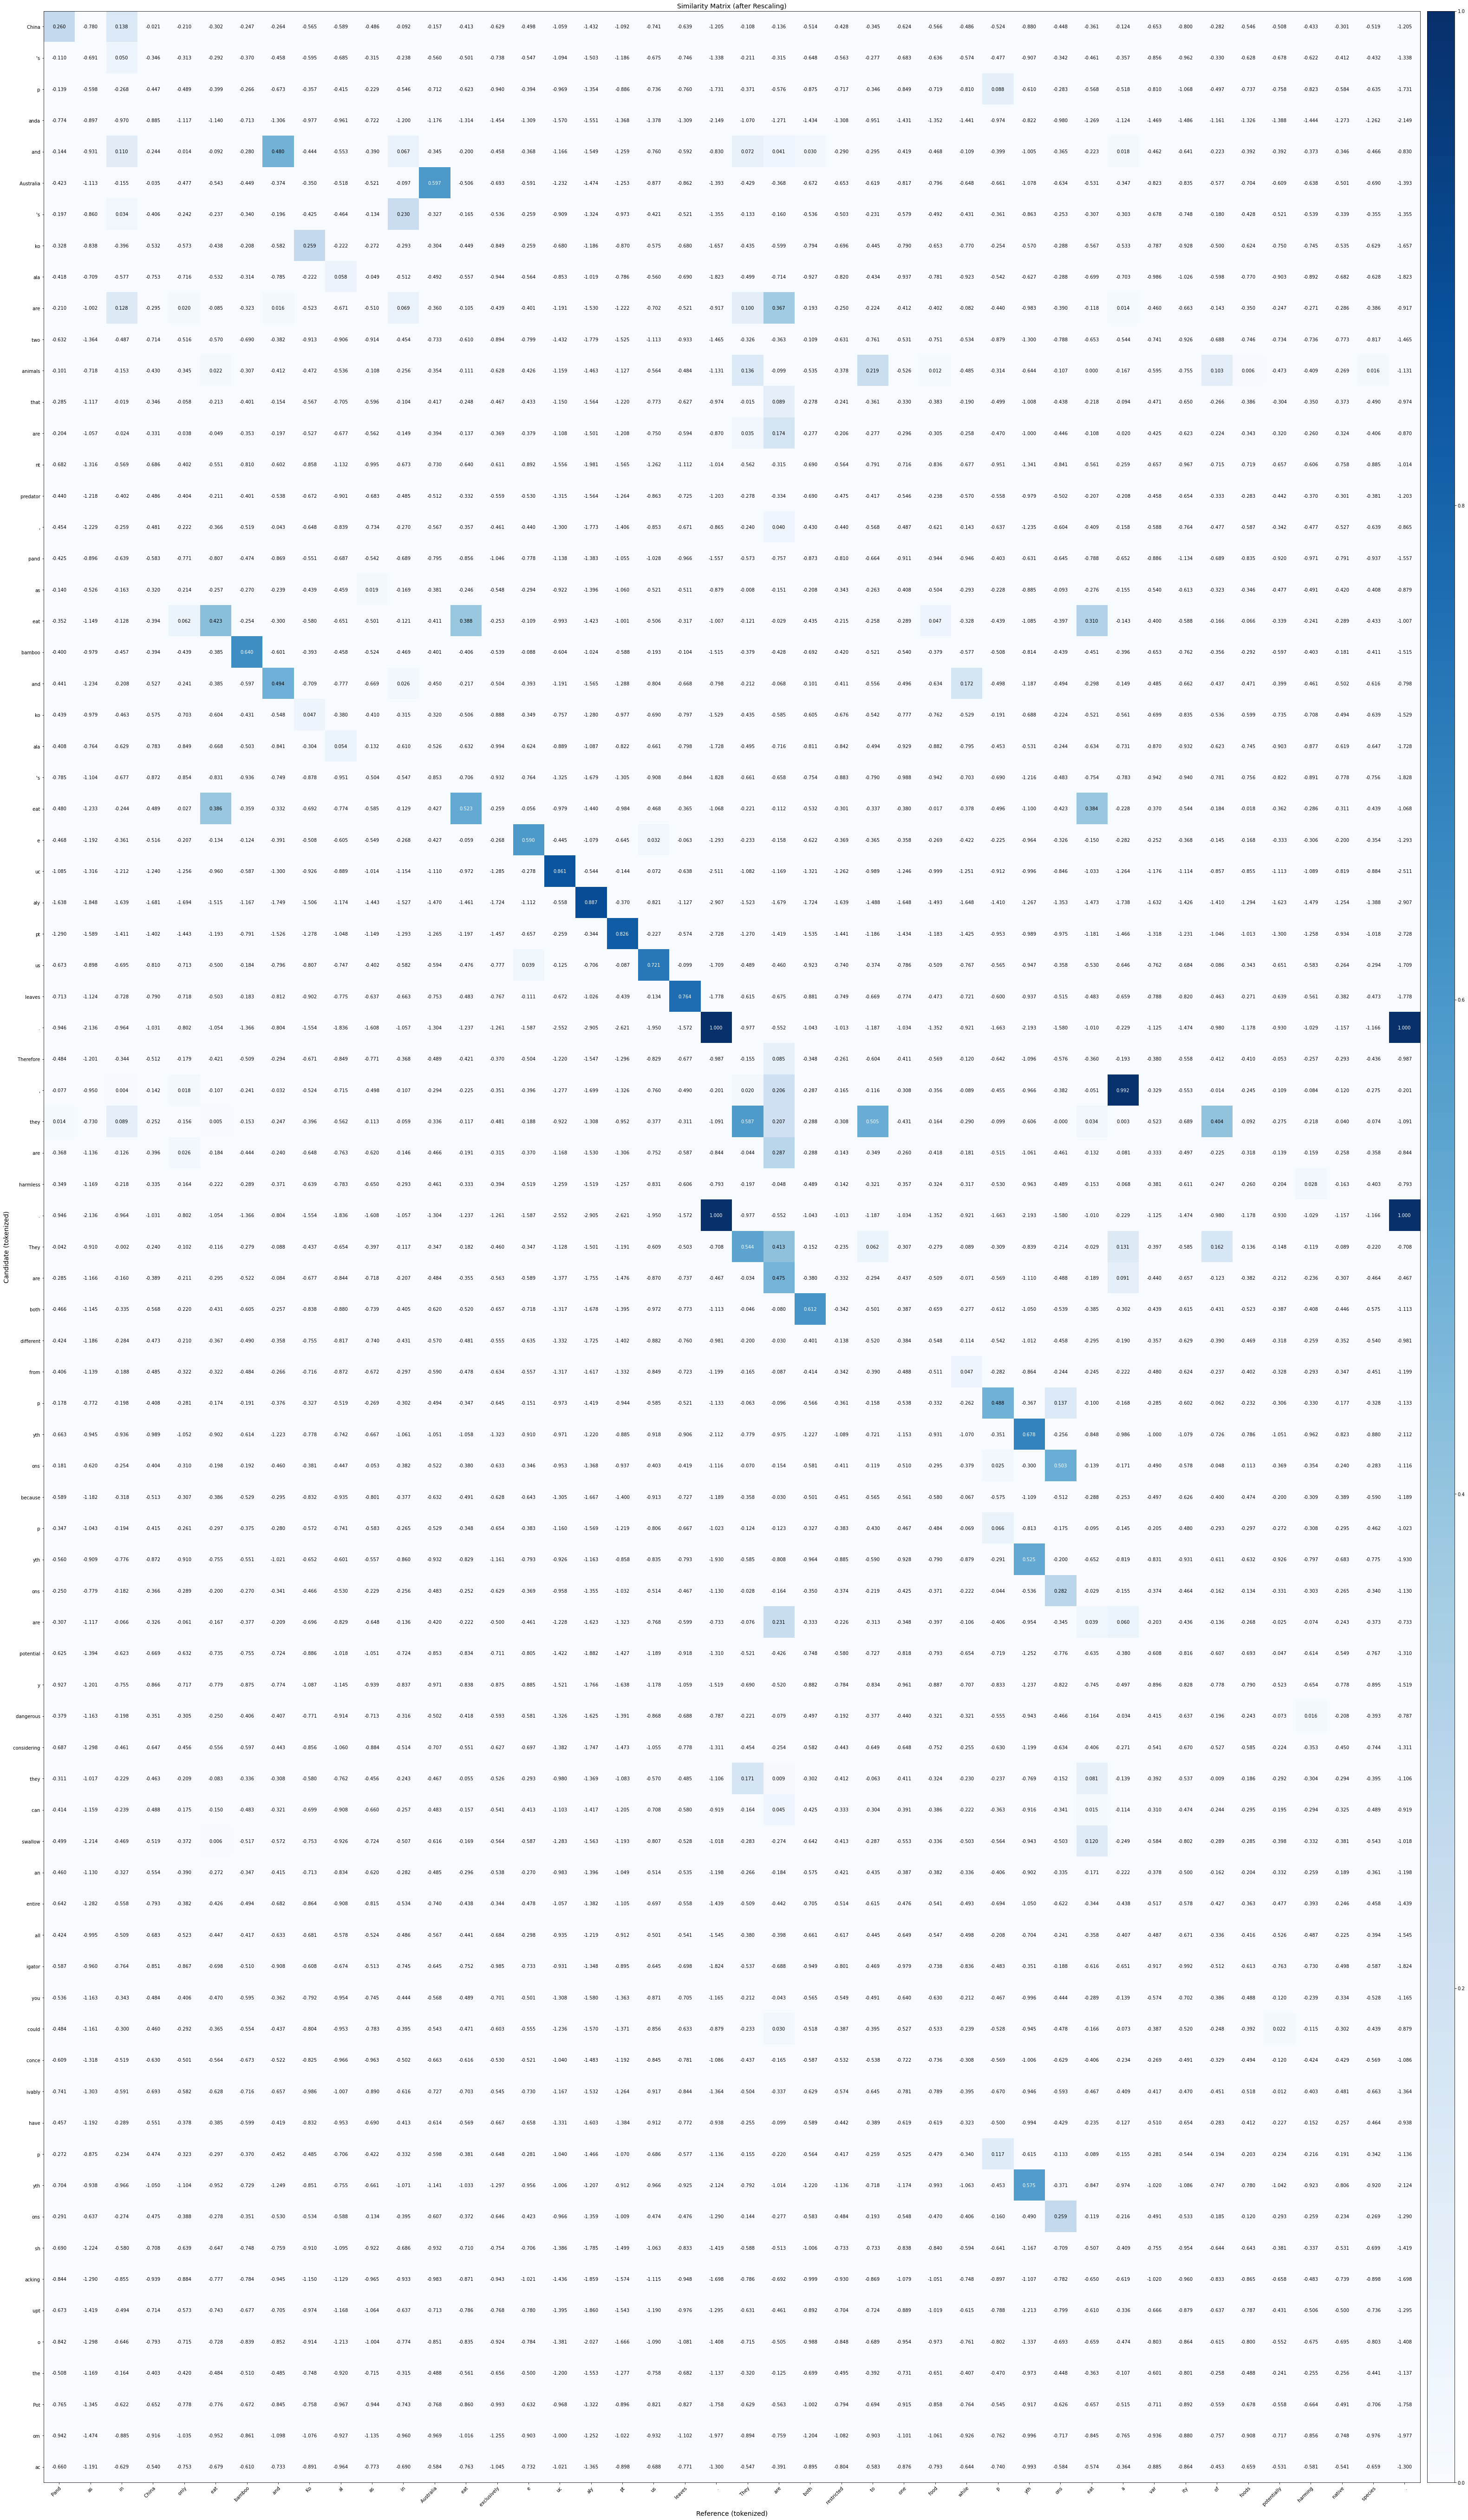

In [0]:
from bert_score import plot_example
cand = cands[0]
ref = refs[0][0]
plot_example(cand, ref, model_type=None, num_layers=None, lang="en", 
                 rescale_with_baseline=True, fname='')